In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import calendar

dfm = pd.read_csv("data_assignment.csv")

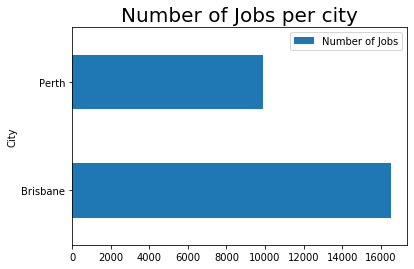

In [9]:
## Section 1

##Analysis 1

# I will compare Brisbane and Perth in that section
# Counting the number of job posts per city (Brisbane and Perth)

#Deleting the unneeded columns and attributing it to a new dataset, which will be used in that section
dfm0 = dfm.drop(['Id','Date','Company','JobType','Area',
                 'SubClassification','Requirement','FullDescription',
                 'Classification','LowestSalary','HighestSalary'], axis=1)

#Renaming the title column to match the study words
dfm0.rename({'Title':'Number of Jobs'}, axis=1, inplace=True)

#Setting the Location as index to work with loc in the next section
dfm0.set_index('Location',inplace=True)

#Filtering the cities that will be used in the study
dfm0 = dfm0.loc[[ 'Brisbane', 'Perth']]

#Counting the number of job posts and grouping it by location
dfm0 = dfm0.groupby(['Location']).count().sort_values('Number of Jobs',ascending=False)

#Creating a graph to present the result and editing some labels
ax0 = dfm0.plot(kind='barh', title='Number of Jobs per city')
ax0.set_ylabel('City')
ax0.title.set_size(20)


In [10]:
##Analysis 1

# Couting the number of jobs divided by Job Type and Location
dfm2 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','Classification','LowestSalary','HighestSalary'], axis=1)
dfm2 = dfm2[(dfm2['Location']=='Brisbane')]
dfm2.rename({'Title':'Number of Jobs', 'JobType': 'Job Type', 'Location': 'City'}, axis=1, inplace=True)
dfm2 = dfm2.groupby(['City','Job Type']).count().sort_values('Number of Jobs',ascending=False)


dfm3 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','Classification','LowestSalary','HighestSalary'], axis=1)
dfm3 = dfm3[(dfm3['Location']=='Perth')]
dfm3.rename({'Title':'Number of Jobs', 'JobType': 'Job Type', 'Location': 'City'}, axis=1,inplace=True)
dfm3 = dfm3.groupby(['City','Job Type']).count().sort_values('Number of Jobs',ascending=False)

dfm2 = pd.concat(([dfm2,dfm3]))

dfm2

#ax = dfm0.unstack(level=0).plot(kind='barh', title='Number of Jobs per City and Job Type', figsize=(10,5)).legend(['Brisbane', 'Perth'])


Number of Jobs
City     Job Type                       
Brisbane Full Time                 10431
         Contract/Temp              3164
         Casual/Vacation            1543
         Part Time                   988
Perth    Full Time                  6056
         Contract/Temp              1968
         Casual/Vacation             967
         Part Time                   658

In [11]:
##Analysis 2

#Counting the number of job posts per city for the top 5 classification/sectors
dfm4 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','JobType','LowestSalary','HighestSalary'], axis=1)
dfm4 = dfm4[(dfm4['Location']=='Brisbane')]
dfm4.rename({'Title':'Number of Jobs','Classification': 'Sector', 'Location': 'City'}, axis=1, inplace=True)
dfm4 = dfm4.groupby(['City','Sector']).count().sort_values('Number of Jobs',ascending=False)
dfm4 = dfm4[:5].copy()

dfm5 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','JobType','LowestSalary','HighestSalary'], axis=1)
dfm5 = dfm5[(dfm5['Location']=='Perth')]
dfm5.rename({'Title':'Number of Jobs','Classification': 'Sector', 'Location': 'City'}, axis=1, inplace=True)
dfm5 = dfm5.groupby(['City','Sector']).count().sort_values('Number of Jobs',ascending=False)
dfm5 = dfm5[:5].copy()

pd.concat(([dfm4,dfm5]))

Number of Jobs
City     Sector                                                
Brisbane Information & Communication Technology            2041
         Trades & Services                                 1627
         Healthcare & Medical                              1341
         Manufacturing, Transport & Logistics              1338
         Hospitality & Tourism                             1032
Perth    Trades & Services                                 1146
         Mining, Resources & Energy                        1048
         Information & Communication Technology             837
         Healthcare & Medical                               792
         Manufacturing, Transport & Logistics               638

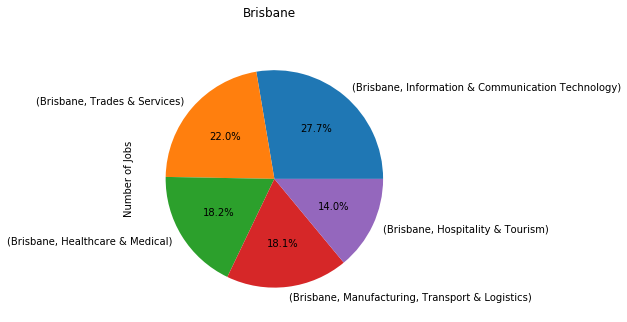

In [12]:
##Analysis 3

axb = dfm4.plot.pie(subplots=True,figsize=(5,5),title='Brisbane',autopct='%1.1f%%',legend=False)

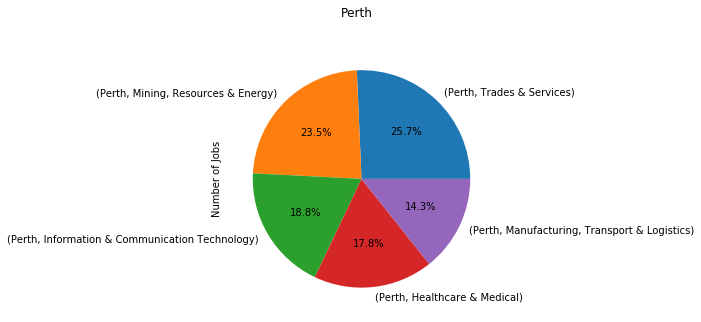

In [13]:
##Analysi 3

axp = dfm5.plot.pie(subplots=True,figsize=(5,5),title='Perth',autopct='%1.1f%%',legend=False)

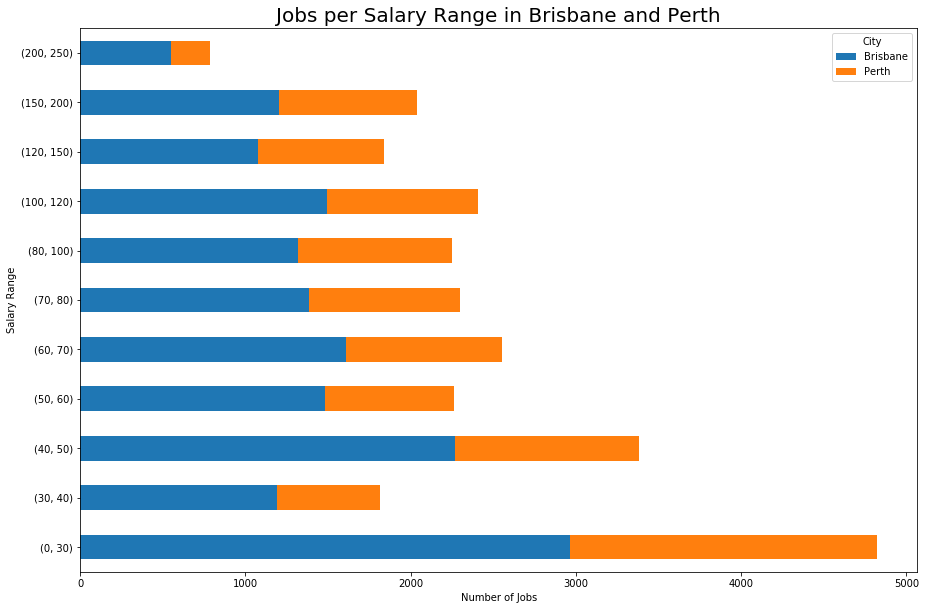

In [14]:
##Analysis 4

#Counting the number of jobs in Brisbane and Perth by salary range
dfm6 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','JobType','Classification'], axis=1)
dfm6 = dfm6[(dfm6['Location']=='Brisbane')]
dfm6 = dfm6.groupby(['Location','LowestSalary','HighestSalary']).count().sort_values('Title',ascending=False)

dfm7 = dfm.drop(['Id','Date','Company','Area','SubClassification','Requirement','FullDescription','JobType','Classification'], axis=1)
dfm7 = dfm7[(dfm7['Location']=='Perth')]
dfm7 = dfm7.groupby(['Location','LowestSalary','HighestSalary']).count().sort_values('Title',ascending=False)

dfm6 = pd.concat(([dfm6,dfm7]))

ax6 = dfm6.unstack(level=0).plot(kind='barh', title='Jobs per Salary Range in Brisbane and Perth', figsize=(15,10), stacked=True)
ax6.set_ylabel('Salary Range')
ax6.set_xlabel('Number of Jobs')
ax6.title.set_size(20)
ax6.legend(['Brisbane','Perth'],title='City')

In [15]:
##Analysis 5

#Counting the number of jobs per company and showing their sector
dfm81 = dfm.drop(['Id','Date','Area','SubClassification','Requirement','FullDescription','JobType','LowestSalary','HighestSalary'], axis=1)
dfm81 = dfm81[(dfm81['Location']=='Brisbane')]
dfm81.rename({'Title':'Number of Jobs', 'Classification': 'Sector', 'Location': 'City'}, axis=1, inplace=True)
dfm81 = dfm81.groupby(['City','Company','Sector']).count().sort_values('Number of Jobs',ascending=False)
dfm81 = dfm81[:5].copy()

dfm82 = dfm.drop(['Id','Date','Area','SubClassification','Requirement','FullDescription','JobType','LowestSalary','HighestSalary'], axis=1)
dfm82 = dfm82[(dfm82['Location']=='Perth')]
dfm82.rename({'Title':'Number of Jobs', 'Classification': 'Sector', 'Location': 'City'}, axis=1, inplace=True)
dfm82 = dfm82.groupby(['City','Company','Sector']).count().sort_values('Number of Jobs',ascending=False)
dfm82 = dfm82[:5].copy()

dfm81 = pd.concat(([dfm81,dfm82]))
dfm81

Number of Jobs
City     Company                                            Sector                                                
Brisbane Jora Local                                         Hospitality & Tourism                              235
         The University of Queensland                       Education & Training                               121
         Paxus                                              Information & Communication Technology             121
         Hudson                                             Information & Communication Technology             116
         MW Recruitment                                     Accounting                                          92
Perth    Jora Local                                         Hospitality & Tourism                              163
         Talent – Winner ‘Seek Large Recruitment Agency ... Information & Communication Technology              78
         KBE Legal Hub                                      Legal                                               72
         Hays Resources & Mining                            Mining, Resources & Energy                          52
         Bankwest Group Services                            Information & Communication Technology              49

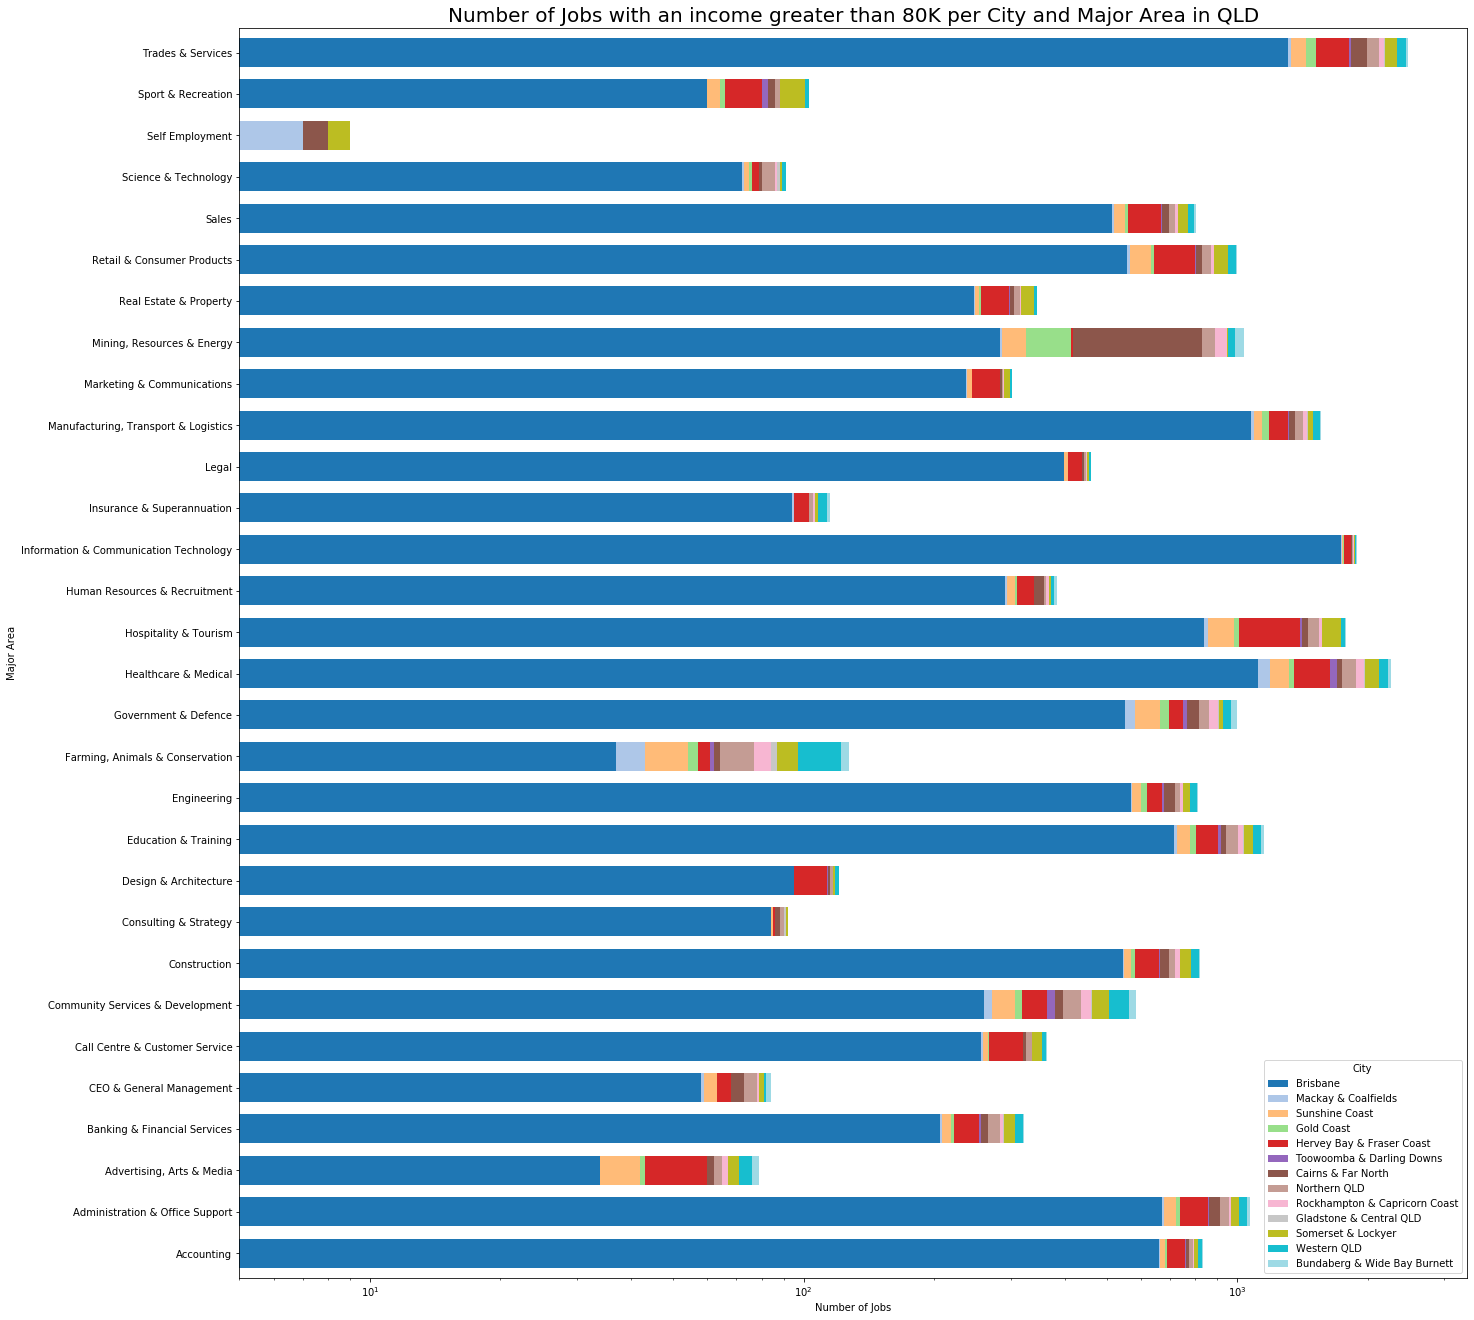

In [16]:
# Section 2 - Scenario 1
# Tom wants to start a degree in Brisbane in a area that pays more than 80K year in QLD.

## APPROACH
# Create a graph that presents the number of jobs that pay more than 80K year divided by city and Major area.
# The graph will help Tom to see the Major area that pays more than 80K, and has more opportunities in QLD by city.

# Cleaning the columns that will not be used
dfmt = dfm.drop(['Id','Date','Company','Area', 'JobType','SubClassification','Requirement','FullDescription','LowestSalary'], axis=1)

#Selecting only rows with an income better than 80K year (39/h)
dfmt = dfmt[(dfmt['HighestSalary']>39)]

#Dropping the column that will not be used
dfmt = dfmt.drop(['HighestSalary'],axis=1)

#Renaming the column to match the scenario words
dfmt.rename({'Classification': 'Major Area'}, axis=1,inplace=True)

#Set the index (Location) that will be used to select rows in the next step
dfmt.set_index('Location',inplace=True)

#Selecting the rows based on the scenario (QLD Cities)
dfmt = dfmt.loc[[ 'Brisbane', 'Mackay & Coalfields', 'Sunshine Coast',
                  'Gold Coast', 'Hervey Bay & Fraser Coast',
                  'Toowoomba & Darling Downs','Cairns & Far North',
                  'Northern QLD', 'Rockhampton & Capricorn Coast',
                  'Gladstone & Central QLD', 'Somerset & Lockyer',
                  'Western QLD', 'Bundaberg & Wide Bay Burnett']]

#Counting the number of job posts by the selected cities in the last step and grouping with their respective city
dfmt = dfmt.groupby(["Location",'Major Area']).count().sort_values('Title',ascending=False)

#Plotting the graph
#Some important options used:
#stacked option to plot the cities in the same bar
#cmap to plot a better space between the bars and use more colors, as far as the normal one run out of colors
axt = dfmt.unstack(level=0).plot(kind='barh', title='Number of Jobs with an income greater than 80K per City and Major Area in QLD', figsize=(22,23),width=0.7,log=True, stacked=True, cmap='tab20')

#Setting labels
axt.set_xlabel('Number of Jobs')
axt.title.set_size(20)
axt.legend(['Brisbane', 'Mackay & Coalfields', 'Sunshine Coast',
                  'Gold Coast', 'Hervey Bay & Fraser Coast',
                  'Toowoomba & Darling Downs','Cairns & Far North',
                  'Northern QLD', 'Rockhampton & Capricorn Coast',
                  'Gladstone & Central QLD', 'Somerset & Lockyer',
                  'Western QLD', 'Bundaberg & Wide Bay Burnett'],title='City')


In [17]:
# Section 1 - Task 2
# Analyse by time
####################

df = pd.read_csv("data_assignment.csv")

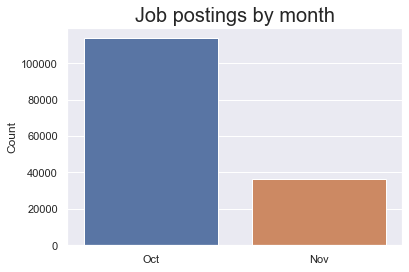

In [18]:
# Task 1-2-a
# Visualise the number of job posts by month

# Define Date column as datetime
df["Date"] = pd.to_datetime(df["Date"])

# Only take rows where the Date isn't empty
df_monthly_counts = df[df["Date"].isna()==False]

# Make a new column called Month, give it the month name of the value in the Date column
df_monthly_counts["Month"] = df_monthly_counts["Date"] = [x.strftime("%b") for x in df_monthly_counts["Date"]]

# Make Month a Categorical datatype for easy and sensible sorting
df_monthly_counts["Month"] = pd.Categorical(df_monthly_counts['Month'], categories=
    list(calendar.month_abbr), ordered=True)

# We only have a few months in our dataset - remove months with zero counts
df_monthly_counts["Month"].cat.remove_unused_categories(inplace=True)

# Group the data by month
df_monthly_counts = df_monthly_counts.groupby('Month').count()

# Prepare plot
df_monthly_counts['Label'] = df_monthly_counts.index
df_monthly_counts['Count'] = df_monthly_counts["Id"]

sns.set()
sns.barplot(x="Label", y="Count", data=df_monthly_counts)

# Set titles and labels
plt.title("Job postings by month", {'fontsize': '20' })
plt.xlabel('')

# Drow the graph
plt.show()

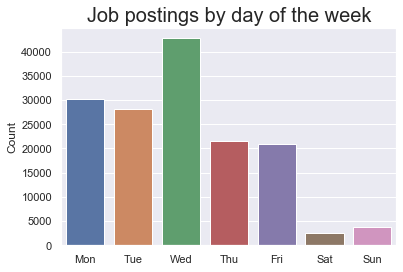

In [19]:
# Task 1-2-b
# Visualise the number of job posts by day of week

# Only take rows where the Date isn't empty
df_dow_counts = df[df["Date"].isna()==False]

# Make a new column called Month, give it the month name of the value in the Date column
df_dow_counts["DayOfWeek"] = df_dow_counts["Date"] = [x.strftime("%a") for x in df_dow_counts["Date"]]

# Make Month a Categorical datatype for easy and sensible sorting
df_dow_counts["DayOfWeek"] = pd.Categorical(df_dow_counts['DayOfWeek'], categories=
    list(calendar.day_abbr), ordered=True)

# Group the data by day of week
df_dow_counts = df_dow_counts.groupby('DayOfWeek').count()

# Prepare plot
df_dow_counts['Label'] = df_dow_counts.index
df_dow_counts['Count'] = df_dow_counts["Id"]

sns.set()
sns.barplot(x="Label", y="Count", data=df_dow_counts)

# Set titles and labels
plt.title("Job postings by day of the week", {'fontsize': '20' })
plt.xlabel('')

# Drow the graph
plt.show()

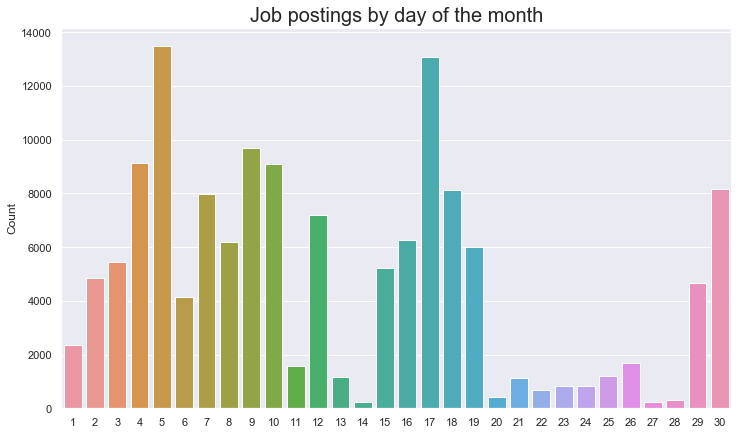

In [20]:
# Task 1-2-c
# Visualise the number of job posts by day of the month. 

# Only take rows where the Date isn't empty
df_dom_counts = df[df["Date"].isna()==False]

# Make a new column called Month, give it the month name of the value in the Date column
df_dom_counts["DayOfMonth"] = df_dom_counts["Date"] = [int(x.strftime("%-d")) for x in df_dom_counts["Date"]]

# Make Month a Categorical datatype for easy and sensible sorting
df_dom_counts["DayOfMonth"] = pd.Categorical(df_dom_counts['DayOfMonth'], categories=
    list(range(1, 31)), ordered=True)

# Group the data by day of month
df_dom_counts = df_dom_counts.groupby('DayOfMonth').count()

# Prepare plot
df_dom_counts['Label'] = df_dom_counts.index
df_dom_counts['Count'] = df_dom_counts["Id"]

plt.figure(figsize=(12,7))

sns.set()
sns.barplot(x="Label", y="Count", data=df_dom_counts)

# Set titles and labels
plt.title("Job postings by day of the month", {'fontsize': '20' })
plt.xlabel('')

# Drow the graph
plt.show()

Text(0.5, 1.0, 'Job postings over time by city')

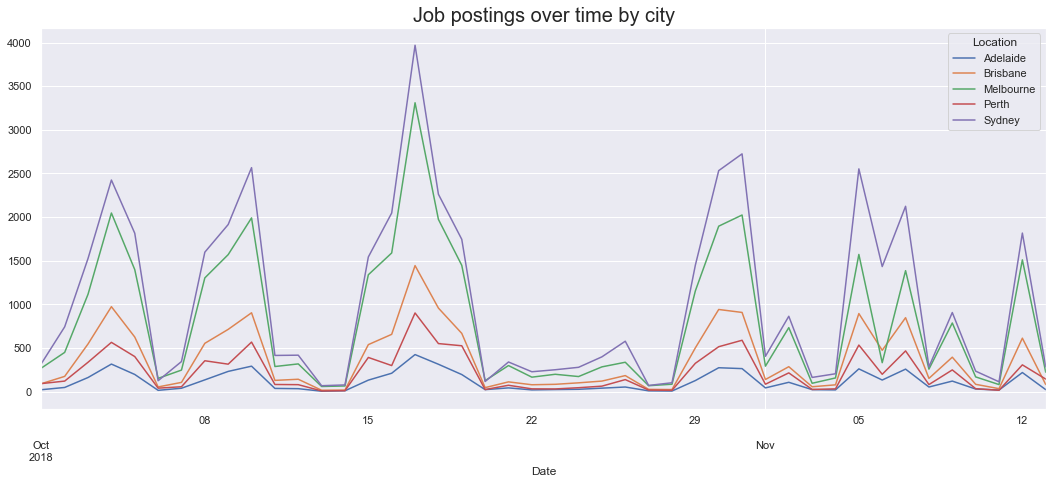

In [21]:
# Task 1-2-d
# Visualise trending of the job postings for the big cities.

df_largest_cities = df.groupby('Location').count()['Id']
df_largest_cities = df_largest_cities.sort_values(ascending = False)
df_largest_cities = df_largest_cities[:5].copy()

# Only take rows where the Date isn't empty
df_city_trend = df[df["Date"].isna()==False]
df_city_trend = df_city_trend.loc[df_city_trend['Location'].isin(df_largest_cities.index)]

# Group the data by city
df_city_trend = df_city_trend.groupby(['Location','Date']).count()['Id'].unstack()
df_city_trend = df_city_trend.transpose()

plt.figure(figsize=(18,7))
df_city_trend.plot(ax = plt.gca())

# Set titles and labels
plt.title("Job postings over time by city", {'fontsize': '20' })
#plt.xlabel('')

# Draw the graph
#plt.show()

# TO-DO:
# - make the ticks a bit more sensible
# - find out what the deal with the Text is
# - make some better comments

In [23]:
# Task 3
# To gain a better reputation, Griffith University wants to attract more students by
# enhancing the employability of the graduates. As a data analyst, you need to give the
# recommendation for the management board for the changing of the admission numbers in
# each major. Which majors should be extended, and which majors should be reduced

## APPROACH

# Idea - look at the Classification and SubClassification with the greatest numbers
# Disqualified ideas - look at job type, as there is a lot of missing data in that column
#                    - free text search for Bachelor, as not many jobs have "Bachelor" in their requirements column
# Assumption - Griffith has an Australia-wide reach with its online courses - have not filtered for SEQ-only jobs

## First we will look at a list of Job Titles. We will need to manually disqualify jobs which don't require a degree

# Make a copy of our original DataFrame
df_jobtitles = df.copy()

# Create a new column called "JobTitle", which is a concatenation of Classicication and SubClassification
df_jobtitles['JobTitle'] = df_jobtitles['Classification'] + ' - ' + df_jobtitles['SubClassification']

# Group the data by JobTitle
df_jobtitles = df_jobtitles.groupby(["JobTitle"]).count()

# Set up the data and order it
df_jobtitles['Count'] = df_jobtitles["Id"]
df_jobtitles = df_jobtitles.sort_values(by=['Count'], ascending = False)
df_jobtitles['Percent'] = df_jobtitles['Count'] / df_jobtitles['Count'].sum()

# Get rid of unneeded columns
df_jobtitles = df_jobtitles.drop(['Id','Date','Area','SubClassification','Requirement','FullDescription','JobType','LowestSalary','HighestSalary','Title','Company','Location','Classification'], axis=1)

df_jobtitles = df_jobtitles[:15].copy()

df_jobtitles.style.format({'Percent': "{:,.2%}"})



,Count,Percent
JobTitle,,
Administration & Office Support - Administrative Assistants,3433,2.29%
Hospitality & Tourism - Chefs/Cooks,3414,2.28%
Retail & Consumer Products - Retail Assistants,3230,2.15%
Information & Communication Technology - Developers/Programmers,3069,2.05%
Government & Defence - Government - State,2928,1.95%
"Manufacturing, Transport & Logistics - Warehousing, Storage & Distribution",2820,1.88%
Sales - Sales Representatives/Consultants,2598,1.73%
Trades & Services - Automotive Trades,2450,1.63%
Hospitality & Tourism - Waiting Staff,2202,1.47%


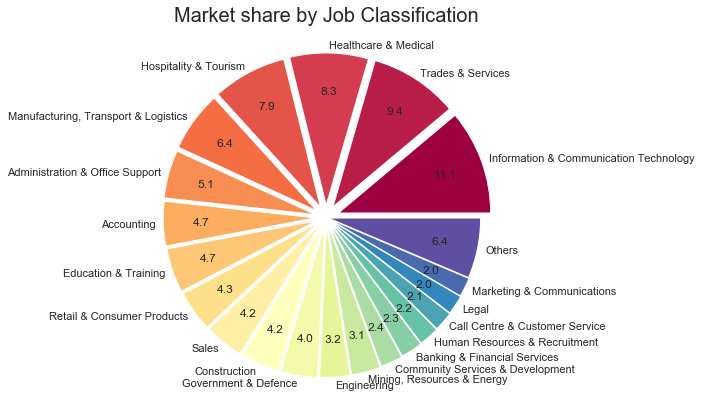

In [24]:
## Now we will look at a listing of Job Classifications to get an overview 
## of the sectors with the greatest number of job vacancies. This can help weight the degrees and faculties

# Copy our source DataFrame
df_loc_jobclass = df.copy()

# Group the data by Classification
df_loc_jobclass = df_loc_jobclass.groupby("Classification").count()

# Set up the data to plot and order it
df_loc_jobclass['Count'] = df_loc_jobclass["Id"]
df_loc_jobclass['Label'] = df_loc_jobclass.index
df_loc_jobclass = df_loc_jobclass.sort_values(by=['Count'], ascending = False)

# Get the top 20 JobTypes
df_plot = df_loc_jobclass[:20].copy()

# Sum the remaing JobTypes and add them as a new row to the DataFrame
new_row = pd.DataFrame(data = {
    'Label' : "Others",
    'Count' : [df_loc_jobclass['Count'][20:].sum()]
})
new_row.index = new_row['Label'] 
df_plot = pd.concat([df_plot, new_row])

# Set up the canvas
plt.figure(figsize=(12,7))
ax1 = plt.subplot(111, aspect='equal')

# Make a pleasing explode effect
explode = np.arange(22, 1, -1) ** .7 * 0.01

# Plot the pie chart, 
df_plot.plot.pie(y='Count', autopct='%1.1f', pctdistance=0.75, ax=ax1, startangle=0,
                     cmap='Spectral', legend=False, explode=explode, labeldistance=1.05)

# Draw the labels
plt.title('Market share by Job Classification', {'fontsize': '20' })
plt.xlabel('')
plt.ylabel('')

plt.show()